Tasks
- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?
- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
path = r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities"
sys.path.append(path)
import plot_settings

In [15]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu_sample = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THI

In [16]:
dmu_sample.shape

(100,)

In [11]:
with open('mu_z.txt', 'w') as f:
    for z, mu, dmu in zip(z_sample, mu_sample, dmu_sample):
        f.write(f"{z} {mu} {dmu}\n")
    f.close()

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_18568\2962798895.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


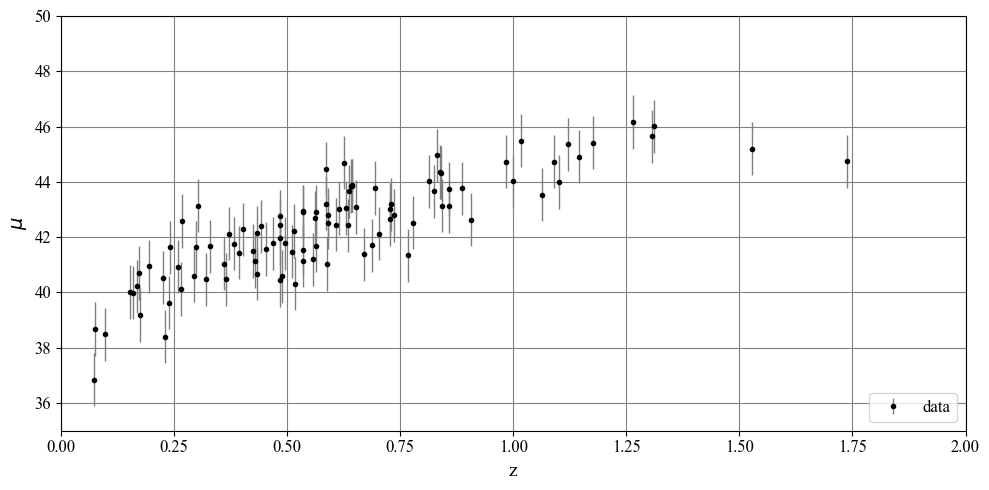

In [12]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

In [13]:
from sklearn.model_selection import ShuffleSplit

In [17]:
X = np.vstack((z_sample, mu_sample, dmu_sample)).T

In [18]:
X.shape

(100, 3)

In [19]:
CV = ShuffleSplit(n_splits=5, test_size=0.4, random_state=1234)

In [25]:
for train_index, test_index in CV.split(X):
    x_train, x_test = z_sample[train_index], z_sample[test_index]
    y_train, y_test = mu_sample[train_index], mu_sample[test_index]
    y_err_train, y_err_test = dmu_sample[train_index], dmu_sample[test_index]

## Polinomial Regression

In [26]:
from astroML.linear_model import PolynomialRegression

In [27]:
degree = 3
model = PolynomialRegression(degree) # fit 1rd degree polynomial
model.fit(x_train.reshape((-1,1)), y_train, y_error=1/y_err_train**2)

PolynomialRegression(degree=3)

In [28]:
y_pred = model.predict(x_test.reshape((-1,1)))
n_constraints = degree + 1

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_18568\3423616690.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


Text(0.5, 1.0, 'Prediction: 3th degree polynomial')

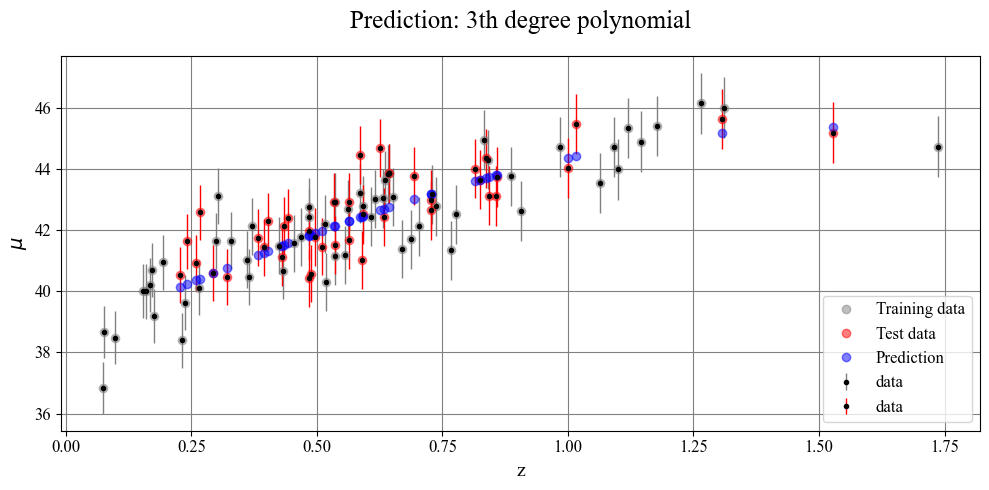

In [29]:
plt.errorbar(x_train, y_train, y_err_train, fmt='.k', ecolor='gray', lw=1,label='data')
plt.errorbar(x_test, y_test, y_err_test, fmt='.k', ecolor='red', lw=1,label='data')
plt.plot(x_train, y_train, 'o', label='Training data', color='gray', alpha=0.5)
plt.plot(x_test, y_test, 'o', label='Test data', color='red', alpha=0.5)
plt.plot(x_test, y_pred, 'o', label='Prediction', color='blue', alpha=0.5)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title('Prediction: %dth degree polynomial' % degree)